In [1]:
import pandas as pd

#load the CSV file
file_path = '/content/satellite_data.csv'
data = pd.read_csv(file_path)
frequency = data.groupby('sat_id').size().reset_index(name='frequency')
frequency

,sat_id,frequency
0,0,217
1,1,476
2,2,93
3,3,79
4,4,273
...,...,...
595,595,113
596,596,85
597,597,82
598,598,146


In [3]:
data['epoch'] = pd.to_datetime(data['epoch'])
min_epoch = data['epoch'].min()
min_epoch
#convert datetime to millisecond with minimum datetime as the starting point of time
data['epoch_delta_ms'] = (data['epoch'] - min_epoch).dt.total_seconds() * 1000
# Categorize 'epoch_delta_ms' into 168 categories
num_categories = 168
data['epoch_category'] = pd.qcut(data['epoch_delta_ms'], num_categories, labels=False, duplicates='drop')
data

,id,epoch,sat_id,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim,epoch_delta_ms,epoch_category
0,741,2014-01-25 00:10:20.368,0,3055.948713,29823.972025,6085.227438,-1.534768,-0.036194,-3.543123,620358.0,0
1,742,2014-01-25 00:57:03.369,0,-1337.714907,27971.442402,-4000.795465,-1.569222,-1.322302,-3.580785,3423359.0,0
2,743,2014-01-25 01:43:46.369,0,-5527.554990,22314.456814,-13492.029333,-1.376563,-2.703735,-3.090802,6226359.0,1
3,744,2014-01-25 02:30:29.370,0,-8809.978734,13072.425457,-20770.687399,-0.926840,-3.807767,-2.016147,9029360.0,2
4,745,2014-01-25 03:17:12.370,0,-10576.656721,1580.095041,-24475.388535,-0.322902,-4.269041,-0.606292,11832360.0,3
...,...,...,...,...,...,...,...,...,...,...,...
146680,1234089,2014-01-31 22:00:22.602,599,-20717.958996,-16245.240500,5250.939232,-1.653931,3.157321,0.079069,597622592.0,166
146681,1234090,2014-01-31 22:25:13.240,599,-22673.444496,-11192.339393,5243.608790,-0.945328,3.603371,-0.092202,599113230.0,166
146682,1234091,2014-01-31 22:50:03.878,599,-23461.830699,-5570.167175,4966.813869,-0.087089,3.912550,-0.281989,600603868.0,166
146683,1234092,2014-01-31 23:14:54.515,599,-22858.679929,373.249102,4396.055679,0.920162,4.021955,-0.485364,602094505.0,167


In [ ]:
unique_epoch_categories_count = data.groupby('sat_id')['epoch_category'].nunique()
j=0
sat_ids_to_remove = []
#remove any sat_id which doesnt contain data for all 168 epochs
for i in unique_epoch_categories_count:
  if(i<168):
    sat_ids_to_remove.append(j)
  j+=1
print(len(sat_ids_to_remove))
cleaned_data = data[~data['sat_id'].isin(sat_ids_to_remove)]

#keep only one data point for each epoch for a given sat_id
max_epoch_per_group = cleaned_data.loc[cleaned_data.groupby(['sat_id', 'epoch_category'])['epoch_delta_ms'].idxmax()]
sorted = max_epoch_per_group.sort_values(by=['epoch_category', 'sat_id'])
sorted

328


,id,epoch,sat_id,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim,epoch_delta_ms,epoch_category
1,742,2014-01-25 00:57:03.369,0,-1337.714907,27971.442402,-4000.795465,-1.569222,-1.322302,-3.580785,3423359.0,0
219,3453,2014-01-25 00:55:22.568,1,7460.193502,11654.338664,-5432.475685,-3.560113,3.951062,-2.541483,3322558.0,0
865,8229,2014-01-25 00:31:53.210,4,17324.771555,8446.958050,8589.280050,3.246947,-1.499601,-3.458764,1913200.0,0
1142,12326,2014-01-25 00:51:40.094,5,12334.788399,-6714.728725,905.420171,-2.501359,-4.851849,-0.458728,3100084.0,0
2085,19546,2014-01-25 01:00:02.161,8,14093.333905,-210.536130,12482.538972,3.092999,1.382612,-3.042660,3602151.0,0
...,...,...,...,...,...,...,...,...,...,...,...
144787,1217164,2014-01-31 23:54:07.675,589,-5892.288917,408.645477,-17046.421332,3.833751,2.291663,-1.070710,604447665.0,167
145285,1222768,2014-01-31 23:34:24.023,592,-21393.118402,32034.833850,-5945.149211,-2.531816,-0.701443,-0.136689,603264013.0,167
145580,1225226,2014-01-31 23:35:54.090,593,-26542.296616,-18320.440600,12807.942534,-2.162275,1.675124,-1.325081,603354080.0,167
145853,1227616,2014-01-31 23:36:27.307,594,-19807.714363,-29642.600564,5429.564324,2.187035,-2.038657,-0.346334,603387297.0,167


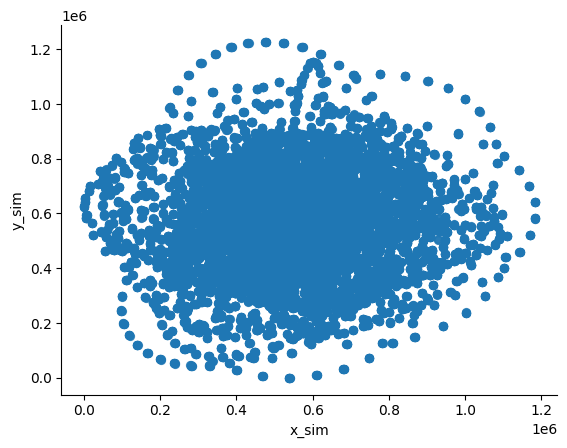

In [ ]:
from matplotlib import pyplot as plt
sorted.plot(kind='scatter', x='x_sim', y='y_sim', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
node_names = {}
j = 0

#convert sat_id to node name and keep only 152 satellites
for i in sorted['sat_id'].unique():
  node_names[i] = "node" + str(j+1)
  if(j>151):
    node_names[i] = 'drop'
  j+=1

def get_node_name(sat_id):
  return node_names[sat_id]

sorted['node_name'] = sorted['sat_id'].apply(get_node_name)
sorted = sorted[sorted['node_name'] != 'drop']

sorted['x_sim'] = (sorted['x_sim'] + (-min(sorted['x_sim']))) * 10
sorted['y_sim'] = (sorted['y_sim'] + (-min(sorted['y_sim']))) * 10

<ipython-input-11-3c626f445d66>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted['x_sim'] = (sorted['x_sim'] + (-min(sorted['x_sim']))) * 10
<ipython-input-11-3c626f445d66>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted['y_sim'] = (sorted['y_sim'] + (-min(sorted['y_sim']))) * 10


In [ ]:
sorted

,id,epoch,sat_id,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim,epoch_delta_ms,epoch_category,node_name
1,742,2014-01-25 00:57:03.369,0,559154.641983,841691.064690,-4000.795465,-1.569222,-1.322302,-3.580785,3423359.0,0,node1
219,3453,2014-01-25 00:55:22.568,1,647133.726075,678520.027305,-5432.475685,-3.560113,3.951062,-2.541483,3322558.0,0,node2
865,8229,2014-01-25 00:31:53.210,4,745779.506605,646446.221163,8589.280050,3.246947,-1.499601,-3.458764,1913200.0,0,node3
1142,12326,2014-01-25 00:51:40.094,5,695879.675043,494829.353416,905.420171,-2.501359,-4.851849,-0.458728,3100084.0,0,node4
2085,19546,2014-01-25 01:00:02.161,8,713465.130104,559871.279370,12482.538972,3.092999,1.382612,-3.042660,3602151.0,0,node5
...,...,...,...,...,...,...,...,...,...,...,...,...
77738,650199,2014-01-31 23:59:00.725,323,588753.884033,478681.301070,-791.942665,5.046717,2.300287,-5.326867,604740715.0,167,node148
78355,658077,2014-01-31 23:46:34.295,325,526208.882069,410694.723826,-13913.838423,-1.899055,-2.326807,3.044971,603994285.0,167,node149
78693,662222,2014-01-31 23:28:02.491,328,689888.133888,122845.435010,1549.885451,2.797985,-0.178491,0.010538,602882481.0,167,node150
79263,665440,2014-01-31 23:49:20.905,329,532806.147758,537425.310772,16459.544738,1.246352,4.620777,1.548776,604160895.0,167,node151


In [ ]:
lines = []
for index, tuple in sorted.iterrows():
  lines.append(str(tuple['epoch_category'] * 60000) + " " + tuple['node_name'] + " " + str(tuple['x_sim']) + " " + str(tuple['y_sim']))

with open('output.txt', 'w') as f:
    f.write('\n'.join(lines))

In [ ]:
print(max(sorted['y_sim']))

1226612.968474362
